In [1]:
from citipy import citipy
from apikeys import weatherApiKey as key
from ipywidgets.embed import embed_minimal_html
import random
import requests
import pandas as pd
import math
import time
import gmaps
import gmaps.datasets
import matplotlib.pyplot as plt
from matplotlib import colors
from apikeys import gmapsKey
gmaps.configure(api_key=gmapsKey) # Your Google API key

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather"
query_params = {
    'appid': key#,
    #'q': 'London'
}
numCities = 500; passedCities = 0;cityNames=[]
weatherInfo={}
weatherInfo['city names']=[];weatherInfo['geo']=[];weatherInfo['temp']=[];weatherInfo['humidity']=[];weatherInfo['pressure']=[];weatherInfo['cloudiness']=[];weatherInfo['windiness']=[];
while numCities > 0:
    lng, lat = random.uniform(-90,90), random.uniform(-180,180)
    city = citipy.nearest_city(lng, lat)
    query_params['q']=city.city_name+','+city.country_code
    weather_response = requests.get(url, params=query_params)
    weather_json = weather_response.json()
    if weather_json['cod']!=200:
        passedCities+=1
        print(city.city_name)
        #time.sleep(1)
    else:
        if not(city.city_name in cityNames):
            numCities-=1
            #print(city.city_name)
            weatherInfo['city names'].append(city.city_name)
            weatherInfo['geo'].append([lng,lat])
            weatherInfo['temp'].append(int(weather_json['main']['temp'])* 9/5 - 459.67)
            weatherInfo['humidity'].append(int(weather_json['main']['humidity']))
            weatherInfo['pressure'].append(int(weather_json['main']['pressure']))
            weatherInfo['cloudiness'].append(int(weather_json['clouds']['all']))
            weatherInfo['windiness'].append(int(weather_json['wind']['speed']))
            cityNames.append(city.city_name)
df=pd.DataFrame(weatherInfo)
df.to_csv('WeatherInfo.csv')
print(f'Skipped {passedCities} cities')

#print(weatherInfo['geo'])
#print(weatherInfo['temp'])


utiroa
mahon
jahrom
gat
yazman
mataura
amderma
japura
grand river south east
mataura
taolanaro
nizhneyansk
mataura
mataura
azad shahr
illoqqortoormiut
raga
sorvag
samana
sentyabrskiy
mataura
yirol
tungkang
nizhneyansk
goderich
taolanaro
airai
taolanaro
taolanaro
mataura
illoqqortoormiut
juba
ciras
taolanaro
mataura
kamenskoye
amderma
viligili
asayita
mullaitivu
belushya guba
mataura
taolanaro
mataura
barentsburg
bolungarvik
illoqqortoormiut
tsihombe
barentsburg
mataura
taolanaro
vila
mataura
illoqqortoormiut
lata
marcona
burica
mys shmidta
samusu
illoqqortoormiut
mataura
illoqqortoormiut
fairlie
mataura
cagayan de tawi-tawi
kerki
amderma
mataura
tukrah
belushya guba
illoqqortoormiut
ruatoria
illoqqortoormiut
illoqqortoormiut
sansai
mataura
taolanaro
mataura
faya
illoqqortoormiut
ye
belushya guba
paradwip
zlatoustovsk
bur gabo
tsihombe
mataura
taolanaro
mutsamudu
asau
mataura
nioro
tabiauea
kadykchan
xiongshi
halalo
mataura
taolanaro
fevralsk
mataura
illoqqortoormiut
illoqqortoormiut
ba

Figure(layout=FigureLayout(height='420px'))

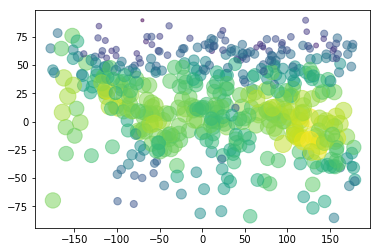

In [7]:
plt.scatter([i[1] for i in weatherInfo['geo']], [i[0] for i in weatherInfo['geo']], 
            s=[(t/5)**2 for t in weatherInfo['temp']], alpha=.5, c=weatherInfo['temp'], norm=colors.Normalize())
#plt.show()
plt.savefig('/Users/Jennifer/Documents/BerkeleyDataScience/Homeworks/HW12/images/tempScatter2.png')
tempFig = gmaps.figure( center=(0, 0), zoom_level=1)
tempFig.add_layer(gmaps.heatmap_layer(list(df['geo']), weights=[(i/5)**4 for i in df['temp']], dissipating=True))
embed_minimal_html('tempScatter.html', views=[tempFig])
tempFig

Figure(layout=FigureLayout(height='420px'))

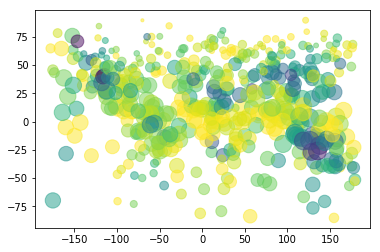

In [8]:
plt.scatter([i[1] for i in weatherInfo['geo']], [i[0] for i in weatherInfo['geo']], 
            s=[(t/5)**2 for t in weatherInfo['temp']], alpha=.5, c=weatherInfo['humidity'], norm=colors.Normalize())
#plt.show()
plt.savefig('humidityScatter.PNG')
humidityFig = gmaps.figure( center=(0, 0), zoom_level=1)
humidityFig.add_layer(gmaps.heatmap_layer(list(df['geo']), weights=list([h**2 for h in df['humidity']]), dissipating=True))
embed_minimal_html('humidityFig.html', views=[humidityFig])
humidityFig


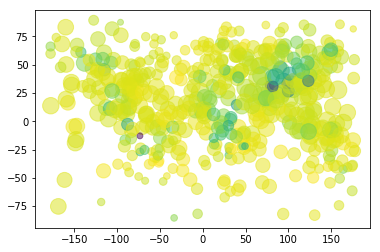

Figure(layout=FigureLayout(height='420px'))

In [12]:
plt.scatter([i[1] for i in weatherInfo['geo']], [i[0] for i in weatherInfo['geo']], 
            s=[(t/5)**2 for t in weatherInfo['temp']], alpha=.5, c=weatherInfo['pressure'], norm=colors.Normalize())
plt.show()
plt.savefig('pressureScatter.PNG')
pressureFig = gmaps.figure( center=(0, 0), zoom_level=1)
pressureFig.add_layer(gmaps.heatmap_layer(list(df['geo']), weights=list(df['pressure']), dissipating=True))
embed_minimal_html('pressureFig.html', views=[pressureFig])
pressureFig


Figure(layout=FigureLayout(height='420px'))

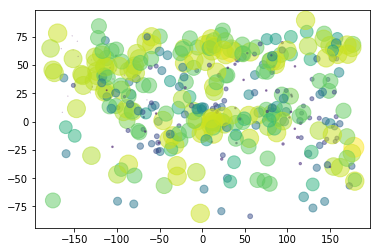

In [10]:
plt.scatter([i[1] for i in weatherInfo['geo']], [i[0] for i in weatherInfo['geo']], 
            s=[(t/5)**2 for t in weatherInfo['cloudiness']], alpha=.5, c=weatherInfo['cloudiness'], norm=colors.Normalize())
#plt.show()
plt.savefig('cloudinessScatter.PNG')
cloudiness = gmaps.figure( center=(0, 0), zoom_level=1)
cloudiness.add_layer(gmaps.heatmap_layer(list(df['geo']), weights=list(df['cloudiness']), dissipating=True))
embed_minimal_html('cloudiness.html', views=[cloudiness])
cloudiness

Figure(layout=FigureLayout(height='420px'))

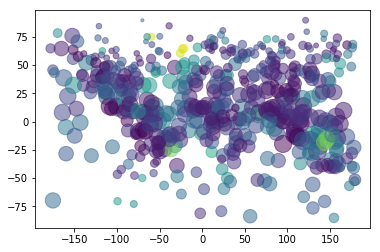

In [11]:
plt.scatter([i[1] for i in weatherInfo['geo']], [i[0] for i in weatherInfo['geo']], 
            s=[(t/5)**2 for t in weatherInfo['temp']], alpha=.5, c=weatherInfo['windiness'], norm=colors.Normalize())
#plt.show()
plt.savefig('windinessScatter.PNG')
windiness = gmaps.figure( center=(0, 0), zoom_level=1)
windiness.add_layer(gmaps.heatmap_layer(list(df['geo']), weights=list(df['windiness']), dissipating=True))
embed_minimal_html('windiness.html', views=[windiness])
windiness
